# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus Project

---

**AI-generated notebook — handle with care!**

This notebook was automatically generated by an AI and has *not* been independently reviewed or verified for accuracy. Please exercise caution when interpreting both the code and the results herein. Always double-check anything critical, especially if working with derived or sensitive data.

## Overview of the Dandiset

- **Project Name:** Allen Institute Openscope - Vision2Hippocampus project
- **Dandiset ID:** DANDI:000690 / version 0.250326.0015
- **Dandiset URL:** [https://dandiarchive.org/dandiset/000690/0.250326.0015](https://dandiarchive.org/dandiset/000690/0.250326.0015)
- **Contributors:** National Institutes of Health (NIH), Allen Institute, Mehta, Mayank R, Purandare, Chinmay, Jha, Siddharth, Lecoq, Jérôme, Durand, Séverine, Gillis, Ryan, Belski, Hannah, Bawany, Ahad, Carlson, Mikayla, Peene, Carter, Wilkes, Josh, Johnson, Tye, Naidoo, Robyn, Suarez, Lucas, Han, Warren, Amaya, Avalon, Nguyen, Katrina, Ouellette, Ben, Swapp, Jackie, Williford, Ali
- **Keywords:** mouse, neuropixel, extracellular electrophysiology, neocortex, hippocampus, Entorhinal cortex, excitatory, inhibitory, vision, movies
- **License:** CC-BY-4.0

**Description:**  
Extensive research shows that visual cortical neurons respond to specific stimuli, e.g. the primary visual cortical neurons respond to bars of light with specific orientation. In contrast, hippocampal neurons are thought to encode not specific stimuli but instead abstract concepts such as space, time and events. This project investigates how representations of visual stimuli evolve through the mouse brain, using a variety of simple (bars of light) and complex (natural movie) stimuli and large-scale extracellular electrophysiology.

Please see the Dandiset page for full experimental details and protocols.

## What does this notebook cover?

- Connecting to the DANDI Archive and exploring the metadata and assets for this Dandiset
- Listing the available NWB files and selecting one of them for detailed inspection
- Loading a selected NWB file *remotely* using PyNWB, h5py, and remfile
- Exploring the NWB file structure: subject information, electrodes, and LFP data
- Displaying the structure as well as some metadata and actual data for illustrative purposes
- Visualizing a short segment of LFP (Local Field Potential) data from selected channels
- Providing helpful code and explanations so that researchers can carry out their own analyses
- Suggesting directions for further exploration

*If you use only select files (as we do here), this is made clear below.*

## Required packages

(These should already be installed in your environment. No install commands are run here.)

- numpy
- pandas
- matplotlib
- h5py
- pynwb
- remfile
- dandi
- dandi.dandiapi

## Connect to DANDI archive and print some basic Dandiset info

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## List of NWB files in this Dandiset

> **Note:** Here, we focus on one example NWB file for detailed analysis:  
> `sub-692072/sub-692072_ses-1298465622_probe-0_ecephys.nwb`

### Information about the file we'll analyze:

- **Path:** sub-692072/sub-692072_ses-1298465622_probe-0_ecephys.nwb  
- **Asset ID:** ba8760f9-91fe-4c1c-97e6-590bed6a783b  
- **Remote download URL:**  
  https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/

[Open this file in NeuroSift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/&dandisetId=000690&dandisetVersion=draft)

We will stream this file directly without downloading the complete file locally.

## Loading and exploring the NWB file

Below shows how to remotely load this NWB file and inspect its contents.
We'll first access the file metadata and structure, then look deeper at LFP data.

In [2]:
import pynwb
import h5py
import remfile

# Always use the URL *verbatim* per official suggestions/usage:
url = "https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print top-level session information
print("Session description:", nwb.session_description)
print("Identifier:", nwb.identifier)
print("Session start time:", nwb.session_start_time)
print("Institution:", getattr(nwb, "institution", "N/A"))
print("Stimulus notes:", getattr(nwb, "stimulus_notes", "N/A"))

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: LFP data and associated info for one probe
Identifier: 0
Session start time: 2023-09-21 00:00:00-07:00
Institution: Allen Institute for Brain Science
Stimulus notes: OpenScopeVision2Hippocampus


## Structure of the NWB file

The file encodes data and metadata for one probe (Neuropixels 1.0), and includes local field potential (LFP) recordings across 95 channels.

<pre>
NWBFile
├─ acquisition
│  └─ probe_0_lfp (LFP)
│      └─ electrical_series
│          └─ probe_0_lfp_data (ElectricalSeries)
│              ├─ data (shape: [10117092, 95])
│              ├─ timestamps (shape: [10117092])
│              └─ electrodes (DynamicTableRegion)
├─ electrode_groups
│  └─ probeA (EcephysElectrodeGroup)
│      ├─ description
│      ├─ location
│      ├─ probe_id
│      ├─ lfp_sampling_rate
│      └─ device
├─ devices
│  └─ probeA (EcephysProbe)
│      ├─ description
│      ├─ manufacturer
│      ├─ sampling_rate
│      └─ probe_id
├─ electrodes (DynamicTable)
│      ├─ location, group, group_name, probe_vertical_position, ...
│      └─ id (ElementIdentifiers)
└─ subject (EcephysSpecimen)
       ├─ subject_id, specimen_name, genotype, sex, species, strain, age, age_in_days
</pre>

*For more exploratory viewing, open the file in [NeuroSift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/&dandisetId=000690&dandisetVersion=draft).*

## Summary table: Subject and probe metadata

In [3]:
import pandas as pd

# Subject info
subject = nwb.subject
subject_info = {
    "subject_id": getattr(subject, "subject_id", ""),
    "specimen_name": getattr(subject, "specimen_name", ""),
    "species": getattr(subject, "species", ""),
    "genotype": getattr(subject, "genotype", ""),
    "sex": getattr(subject, "sex", ""),
    "strain": getattr(subject, "strain", ""),
    "age": getattr(subject, "age", ""),
    "age_in_days": getattr(subject, "age_in_days", ""),
}
display(pd.DataFrame([subject_info]))

# Probe/device info
devices = nwb.devices
probeA = devices["probeA"]
probe_info = {
    "description": getattr(probeA, "description", ""),
    "manufacturer": getattr(probeA, "manufacturer", ""),
    "sampling_rate": getattr(probeA, "sampling_rate", ""),
    "probe_id": getattr(probeA, "probe_id", ""),
}
display(pd.DataFrame([probe_info]))

,subject_id,specimen_name,species,genotype,sex,strain,age,age_in_days
0,692072,692072,Mus musculus,wt/wt,M,Transgenic,P82D,82.0


,description,manufacturer,sampling_rate,probe_id
0,Neuropixels 1.0 Probe,imec,30000.0,0


## Electrode table columns

In [4]:
# Print the column names and show first few rows of the electrodes table
print("Electrode table columns:")
print(list(nwb.electrodes.colnames))
df_elec = nwb.electrodes.to_dataframe()
display(df_elec.head())

Electrode table columns:
['location', 'group', 'group_name', 'probe_vertical_position', 'probe_horizontal_position', 'probe_id', 'local_index', 'valid_data', 'x', 'y', 'z', 'imp', 'filtering']


,location,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,local_index,valid_data,x,y,z,imp,filtering
id,,,,,,,,,,,,,
2,PF,probeA abc.EcephysElectrodeGroup at 0x12350741...,probeA,40,59,0,2,True,7465.0,3406.0,6685.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
6,TH,probeA abc.EcephysElectrodeGroup at 0x12350741...,probeA,80,59,0,6,True,7462.0,3371.0,6695.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
10,TH,probeA abc.EcephysElectrodeGroup at 0x12350741...,probeA,120,59,0,10,True,7460.0,3336.0,6706.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
14,TH,probeA abc.EcephysElectrodeGroup at 0x12350741...,probeA,160,59,0,14,True,7458.0,3293.0,6719.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
18,LP,probeA abc.EcephysElectrodeGroup at 0x12350741...,probeA,200,59,0,18,True,7456.0,3258.0,6730.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...


## LFP data: overview and brief visualization

We demonstrate how to access and visualize a small segment of LFP data across several channels. The full LFP data matrix is shape (10117092, 95) (timepoints × channels), so we'll access just 3 seconds for 4 example channels to keep memory use reasonable.

- **Units:** Volts
- **Sampling rate:** 625 Hz
- **Channels shown:** ID values from the electrodes table, not indices.

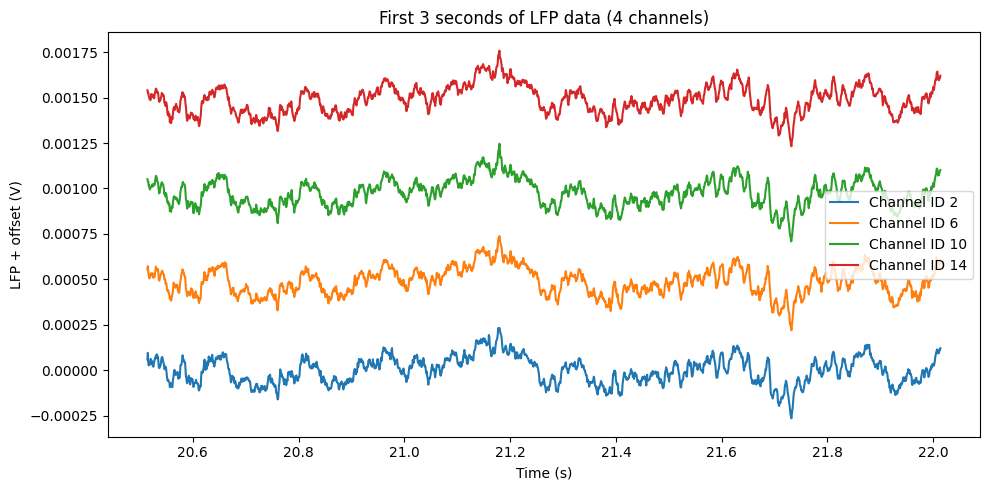

In [5]:
import numpy as np
import matplotlib.pyplot as plt

probe_0_lfp = nwb.acquisition["probe_0_lfp"]
lfp_es = probe_0_lfp.electrical_series["probe_0_lfp_data"]

n_ch = lfp_es.data.shape[1]
n_time = lfp_es.data.shape[0]
sampling_rate = 625  # Hz (as reported in metadata/field)

n_seconds_to_show = 3
n_ch_to_show = 4

# Select the first n_ch_to_show channels for this example
chs_to_view = list(range(n_ch_to_show))

# Only retrieve as much as we need for memory efficiency!
n_samp = n_seconds_to_show * sampling_rate

# Use the IDs from the electrodes table
ch_ids = lfp_es.electrodes.table.id[:]
shown_ids = ch_ids[chs_to_view]

# Retrieve traces and timestamps for the selected interval and channels
lfp_seg = lfp_es.data[:n_samp, :n_ch_to_show]
ts_seg = lfp_es.timestamps[:n_samp]

plt.figure(figsize=(10, 5))
offset = 0.0005  # Offset between channels for visibility (in Volts)
for i, ch in enumerate(chs_to_view):
    plt.plot(ts_seg, lfp_seg[:, i] + i * offset, label=f"Channel ID {shown_ids[i]}")
plt.xlabel("Time (s)")
plt.ylabel("LFP + offset (V)")
plt.title("First 3 seconds of LFP data (4 channels)")
plt.legend()
plt.tight_layout()
plt.show()

## More info: Inspecting electrode/channel properties

In [6]:
# For the visualized channels, show location and group_name
meta_subset = df_elec.iloc[chs_to_view][["id", "location", "group_name", "probe_vertical_position", "probe_horizontal_position", "valid_data"]]
display(meta_subset)

KeyError: "['id'] not in index"

## Future directions and notes

This notebook illustrated how to stream and analyze a small segment of LFP data using remote NWB files from DANDI. Many further analyses are possible:

- Explore additional channels or longer time periods (be wary of memory/IO constraints on remote data).
- Analyze power spectra, correlations between channels, or responses to different stimuli.
- Investigate probe/channel locations in relation to brain regions.
- Aggregate data across multiple sessions, subjects, or stimulus types.
- For richer exploration, examine spike times (Units), events, or trial structure if available.

Further information and analysis tools:
- [DANDI documentation](https://www.dandiarchive.org/)
- [NWB user guide](https://pynwb.readthedocs.io/en/stable/)
- [NeuroSift interactive visualizer](https://neurosift.app/nwb)

*If you run into errors or missing data, please consult the Dandiset documentation or contact the dataset contributors.*